In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [459]:
# READING THE DATA_FILE :

mail=pd.read_csv("spamham.csv")
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [460]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [461]:
# SHAPE OF THE INPUT FILE :

shape_=mail.shape
shape_



(5572, 2)

In [462]:
# GETTING THE COLUMN HEADERS : 

mail.columns

Index(['Category', 'Message'], dtype='object')

In [463]:
# RENAMING THE COLUMN HEADERS :

mail.rename(columns=str.lower,inplace=True)
mail.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [464]:
# GETTING THE UNIQUE VALUES IN THE REQUIRED COLUMN :

mail['category'].unique()

array(['ham', 'spam'], dtype=object)

In [465]:
# GETTING THE NUMBER OF UNIQUE VALUES IN REQUIRED COLUMN :

mail['category'].nunique()


2

In [466]:
# FREQUENCY OF EACH VALUE IN THE TARGET VARIABLE 

mail['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [467]:
# CHECKING FOR  NUMBER OF NULL VALUES :

mail.isna()
mail.isna().sum()

category    0
message     0
dtype: int64

In [468]:
# CHECKING FOR DUPLICATES :

mail.duplicated()
a=mail[mail.duplicated()]
a

# Duplicates are removed in one of the cell below,Hence no output is shown

,category,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [469]:
# SHAPE OF DUPLICATED ROWS :

a.shape

(415, 2)

In [470]:
# REMOVING DUPLICATE DATA FROM DATA_SET :

print("Actual Data Shape                        :",shape_)
mail.drop_duplicates(inplace=True)

print("Shape of Data after removing duplicates\t :",mail.shape)

Actual Data Shape                        : (5572, 2)
Shape of Data after removing duplicates	 : (5157, 2)


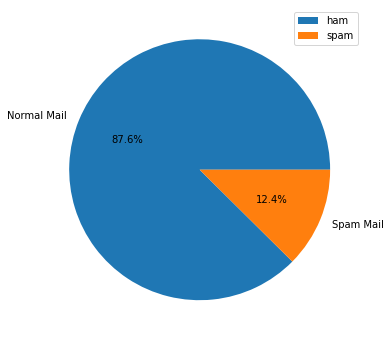

In [471]:
# REPRESENTING FREQUENCY OF EACH MAIL TYPE IN PIE CHART :

mp.figure(figsize=(6,6))

label=mail.category.value_counts().index
labels=['Normal Mail','Spam Mail']


mp.pie(mail.category.value_counts(),autopct='%.1f%%',labels=labels)
mp.legend(label)

mp.show()
 

In [472]:
#CONVERTING TO BINARY DATA :

mail.loc[mail['category'] == 'ham', 'category']  = 0     # DISADVANTAGE : data will be of dtype <object> instead of <int>
mail.loc[mail['category'] == 'spam', 'category'] = 1

mail=mail.astype({'category':'int'})                     # Converting column to dtype <int>
mail.head()


,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [500]:
# SEPERATING INPUT AND TARGET VARIABLES :

x=mail['message'].values                         # Input Data      .values ,takes each entry into an numpy array
                                                                   #if not done,possibility of errors during vectorization
print("INPUT DATA :")
print(x,'\n')
print(x.shape)

y=mail['category'].values                        # Target Data 

print("TARGET DATA :")
print(y)
print(y.shape)

print(mail.info())

INPUT DATA :
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] 

(5157,)
TARGET DATA :
[0 0 1 ... 0 0 0]
(5157,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   int32 
 1   message   5157 non-null   object
dtypes: int32(1), object(1)
memory usage: 100.7+ KB
None


<b>MACHINE LEARNING IMPLEMENTATION :</b>

In [518]:
# IMPORTING NECESSARY PACKAGES AND MODULES :

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer 
# To convert Text data into vector form 


In [502]:
#   Reading data : 

mail.iloc[0:5].values

array([[0,
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       [0, 'Ok lar... Joking wif u oni...'],
       [1,
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       [0, 'U dun say so early hor... U c already then say...'],
       [0,
        "Nah I don't think he goes to usf, he lives around here though"]],
      dtype=object)

<b>Converting 'Text Data' into 'Feature Vectors' that can be used as Input for ML Model :-</b>

In [511]:
# Vectorize words - Turn the text numerical feature vectors :

vectorizer= TfidfVectorizer(min_df=1,
                            stop_words='english',
                            lowercase='True')
x_=vectorizer.fit_transform(x)


# to get all the possible Feature :
feature_names = vectorizer.get_feature_names()
print("Number of different words: {0}".format(len(feature_names)))

# To get a few Word Examples :
print("Word example: {0}".format(feature_names[6000:6005]))

# TRAIN-TEST SPLIT :
# Creating a train/test split using 20% test size.

x_train ,x_test, y_train, y_test = train_test_split(x_,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=4)

y_train=y_train.astype(int)        # Converting y_train to type <int> from <object> 
y_test=y_test.astype(int)          # Converting y_test to type <int> from <object>

print(x_train_features.shape)
print("x_train shape  :",x_train.shape)
print("x_test shape   :",x_test.shape)
print("y_train shape  :",y_train.shape)
print("y_test shape   :",y_test.shape)


Number of different words: 8440
Word example: ['ptbo', 'pthis', 'pub', 'public', 'publish']
(5157, 8440)
x_train shape  : (4125, 8440)
x_test shape   : (1032, 8440)
y_train shape  : (4125,)
y_test shape   : (1032,)


<b>SVM ALGORITHM IMPLEMENTATION :</b>

In [531]:
# SVM MODEL :

# Creating classifier :
model= LinearSVC()

# Fit the classifier on the training features and labels :
model.fit(x_train,y_train)


# prediction & checking accuracy on trained data :

prediction_on_training_data=model.predict(x_train)
accuracy=metrics.accuracy_score(prediction_on_training_data,y_train)

print("accuracy on train data =", accuracy*100)
print("Classification Report on test data :\n",classification_report(y_train,prediction_on_training_data))

# prediction & checking accuracy on test data :

prediction_on_test_data=model.predict(x_test)
accuracy_=metrics.accuracy_score(prediction_on_test_data,y_test)

print("accuracy on test data =", accuracy_*100,'\n')
print("Classification Report on test data :\n",classification_report(y_test,prediction_on_test_data))


accuracy on train data = 99.95151515151515
Classification Report on test data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       1.00      1.00      1.00       513

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

accuracy on test data = 97.67441860465115 

Classification Report on test data :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.97      0.84      0.90       128

    accuracy                           0.98      1032
   macro avg       0.97      0.92      0.94      1032
weighted avg       0.98      0.98      0.98      1032



<b> PREDICTING THE TYPE OF MAIL BY GIVING INPUT TO THE MODEL :</b>                                                          
<b>Function  testcase()</b> is written for the above

In [553]:
def test_case():
#    test_email = ["Free Free Free,A gift will be spent to you, register with us"]
#    test_mail  = ["Hi Mike!, Lets go for football tomorrow"]
   
    test_mail   = input("Enter the mail to be checked\t")
    examples   = feature_extraction.transform(test_email)
    prediction = model.predict(examples)


    if prediction==0:
        prediction="\'NOT A SPAM\'" 
    else:
        prediction=" \'A SPAM\'"
    print(f"\nThe input mail is  :{prediction.upper()} Mail") 

    
test_case()


# ALSO CAN BE DONE LIKE THIS : (TERNARY OPERATOR WAY)
#print("The Input Email is \'NOT A SPAM\'") if prediction==0 else print("The Input Email is \'A SPAM\'")
    

Enter the mail to be checked	Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

The input mail is  : 'A SPAM' Mail


<b>ANOTHER WAY FOR GIVING INPUT :</b>

<b>NOTE :</b>                                                                                                                   
Spam Mail_ ---> 1                                                                                                        
Normal Mail ---> 0

In [552]:
email = ["Hello George, how about a game of tennis tomorrow?",
         "You are awarded a SiPix Digital Camera! call",
         "Dear Sara, I prepared the annual report. Please check the attachment.",
         "Hi David, will we go for cinema tonight?",
         "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.",
         "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]


examples = vectorizer.transform(email)
predictions = model.predict(examples)
predictions


array([0, 1, 0, 0, 1, 1])